# Singapore Institute of Management - University of London
# CM2015 Programming with Data Mid-Term
#### UOL Student ID 200553087
#### SIM Student ID 10222329
#### Alysa Nadya Binte Mohamed Yusoff

## World Happiness
We have all heard of the term World Happiness - it is a ranking given to each country by the World Happiness Report based on national happiness. The way the happiness of a nation is calculated is based on a six factors: gross development product per capita, social support (having someone to count on in times of trouble), healthy life expectancy, freedom (to make life decisions), generosity (donations) and trust (absense of corruption in goverment/business). Dystopia residual (a benchmark against which to compare each other country’s performance in terms of each of the six factors), is also considered. And yet, there is also another term that is the Happiness-Suicide Paradox. The Happiness-Suicide Paradox is where the happiest countries are also the ones that harbor the highest suicide rates. Normally, we would think that the more happy a nation is, the less casualty there would be as well. Right?

Although these countries are ranked by how "happy" they are, I wanted to find out if these countries are truly happy. I am going to be comparing their happiness ranks and scores, against things like their gross development per capita (GDP/Capita), human development index (HDI), suicide and unemployment rates. My objective is to find out if there is any bias in the calculations for happiness and why it is. What should be the real judge of happiness? 

The datasets I will be working with are from https://www.kaggle.com/, https://ourworldindata.org/ and https://www.worldbank.org/en/home. All of these datasets are open source and free to use.

The way that I will be working with the datasets is analyzing the topics (suicide, unemployment, GDP and HDI) one by one, then comparing them to the "Ranking of Happiness" from the World Happiness Report 2016 by plotting graphs to find if there is any correlation, or even any discrepancies. Though this topic has been explored, I will also be proposing a new form of calculation to determine happiness of a nation, which is by my own calculations.

In [1]:
import pandas as pd
pd.__version__

'1.1.3'

In [2]:
import numpy as np
np.version

<module 'numpy.version' from 'C:\\Users\\ASUS\\anaconda3\\lib\\site-packages\\numpy\\version.py'>

In [3]:
import matplotlib.pyplot as plt

### Suicides in 2016
Suicide is an ever prevalent issue in the world today. Arguably, (most) suicides happen when people are unhappy with their life. Hence it would make sense that when judging happiness, the suicide rate in a country should be one of, if not the deciding factor.

The dataset I am using in this portion has been downloaded from the link below. It has each country's data of year, sex, number of suicides by age-range and generation, human development index (HDI) and gross developement product (GDP). This data is appropriate in which the suicide rates can reflect on a nation's economy or society.

Data Source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [4]:
kaggle = pd.read_csv("master.csv", delimiter = ",")
kaggle.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


I will only be comparing suicide rates of each country in 2016. Initially, I wanted to compare all of the years for each country, but since this is such a large dataset, I will only be focusing on the year 2016 and the countries with that year's data. I am also dropping columns that are not pertinent to the current visualization, such as the sex, HDI and GDP.

You will see that I have omitted out Grenada and Czech Republic, even though the data for 2016 exists. The reason for this omission is as I was examining other datasets in 2016, I noticed that data for these two countries were not available. To keep the data consistent throughout, they have been removed.

In [5]:
suicideRate = kaggle.loc[kaggle.year == 2016]
suicideRate = suicideRate.drop(columns = ['year', 'sex', 'age', 'HDI for year', 'country-year', ' gdp_for_year ($) ', 'generation', 'gdp_per_capita ($)'])
suicideRate = suicideRate.loc[(suicideRate.country != 'Grenada') & (suicideRate.country != 'Czech Republic')]
# renaming the column to remove the spaces between the words and illegal character '/'
suicideRate = suicideRate.rename(columns = {'suicides/100k pop': 'suicidesper100kpop'})
suicideRate.head(5)

,country,suicides_no,population,suicidesper100kpop
1248,Armenia,12,61956,19.37
1249,Armenia,16,237813,6.73
1250,Armenia,16,350633,4.56
1251,Armenia,5,202220,2.47
1252,Armenia,2,102414,1.95


Since the sex and age range has been removed from the data, I will make the data more concise by grouping it by country, and adding the number of suicides and population together. However, when collapsing the data using sum(), it is readily assumed that the number of suicides per 100,000 population has also been summed up. This, is inaccurate.

The number of suicides and the population are static numbers, which means that they stay accurate. The rate of suicide cannot be easily summed up because they are dependent on the two aformentioned numbers. To remove the discrepancies, I am iterating through the data and calculating the new value for the rate of suicide. Using that new value, it will replace the inaccurate value in the cell.

I am also going to be calculating the mean of the rate, so that when the graph is plotted, I am able to see which country's rate is higher than the mean.

In [6]:
suicideRate = suicideRate.groupby(['country']).sum().reset_index()

# correcting and replacing inaccurate data
for i in suicideRate.iterrows():
    newVal = (i[1].suicides_no / i[1].population) * 100000
    newVal = round(newVal, 2)
    suicideRate = suicideRate.replace(i[1].suicidesper100kpop, newVal)
    
suicideMean = round(suicideRate['suicidesper100kpop'].mean(), 2)

suicideRate = suicideRate.sort_values(by = ['suicidesper100kpop'], ascending = True)
suicideRate

,country,suicides_no,population,suicidesper100kpop
0,Armenia,67,2400033,2.79
10,Qatar,68,2213121,3.07
3,Cyprus,36,711344,5.06
13,Thailand,4117,53442001,7.70
7,Mauritius,98,992432,9.87
11,Romania,1953,16644905,11.73
9,Netherlands,1886,14239554,13.24
12,Sweden,1130,8125852,13.91
5,Iceland,40,268773,14.88
1,Austria,1201,7484629,16.05


I have also sorted the data by the rate of suicide in ascending order. The reason I do this, is so that I can create a custom order of countries according to the table you see above. This custom order will be used to sort other data into the same order.

In [7]:
customOrder = []
for i in suicideRate.iterrows():
    customOrder.append(i[1].country)
customOrder

['Armenia',
 'Qatar',
 'Cyprus',
 'Thailand',
 'Mauritius',
 'Romania',
 'Netherlands',
 'Sweden',
 'Iceland',
 'Austria',
 'Croatia',
 'Mongolia',
 'Hungary',
 'Lithuania']

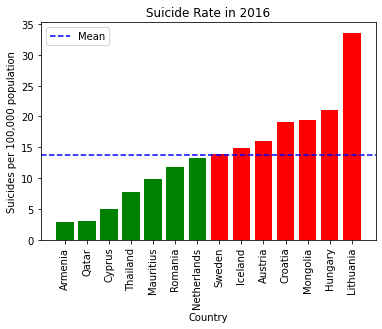

13.68

In [8]:
fig, ax = plt.subplots()
# if the suicide rate is more than the mean, the color of the bar will be red else, it will be green
redgreen = ['r' if (x > suicideMean) else 'g' for x in suicideRate.suicidesper100kpop ]
ax.bar(suicideRate.country, suicideRate.suicidesper100kpop, color = redgreen)
# draw the mean line against the bar chart
plt.axhline(y = suicideMean , color = 'b', linestyle = '--', label = 'Mean')
plt.xticks(rotation = 90)
plt.title('Suicide Rate in 2016')
plt.xlabel('Country')
plt.ylabel('Suicides per 100,000 population')
plt.legend()
plt.show()

suicideMean

If I were to draw a conclusion from this chart alone, I would assume that Armenia is the happiest country in the world, while Lithuania would be the least happiest. Hence for that reason, the custom order I have created will sort data in this fashion, assuming Armenia is the happiest and Lithuania is the least happiest.

### Unemployment in 2016
Aside from suicide, unemployment could be another factor in determining happiness. A job pays you, which in turn pays for a roof over your head, food to eat and other resources such as electricity, gas and water. Not having a job could mean poverty and homelessness for some.

This next dataset I am using is downloaded from World Bank, detailing the national estimate of unemployment.

Data Source: https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.NE.ZS&country=#

In [9]:
WorldBank = pd.read_csv("16b9dbf7-8f35-4f0a-a023-963b6395160f_Data.csv", delimiter = ",")
WorldBank = WorldBank.drop(columns = ['Series Code', 'Country Code', '1990 [YR1990]', '2000 [YR2000]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'])
WorldBank = WorldBank.rename(columns = {'Country Name': 'country'})
WorldBank = WorldBank.rename(columns = {'2016 [YR2016]': 'Rate'})
WorldBank.head(5)

,Series Name,country,Rate
0,"Unemployment, total (% of total labor force) (...",Afghanistan,..
1,"Unemployment, total (% of total labor force) (...",Albania,15.42
2,"Unemployment, total (% of total labor force) (...",Algeria,10.2
3,"Unemployment, total (% of total labor force) (...",American Samoa,..
4,"Unemployment, total (% of total labor force) (...",Andorra,..


To extract out the same countries as the ones in the suicide table, I will iterate through the custom order I created and locate the data in WorldBank where the country is the same. That data is then stored temporarily and inserted into a new dataframe. No sorting is needed here as while iterating, the table will be sorted in the way I desire.

In [10]:
# extracting data
unemploymentRate = pd.DataFrame()
for i in customOrder:
    temp = WorldBank.loc[WorldBank['country'] == i]
    unemploymentRate = unemploymentRate.append(temp)
    
# by default, unemploymentRate['Rate'] is class <'str'>
# since I want to calculate the mean, I am converting it to class <'float'> type instead
for i in unemploymentRate.iterrows():
    newVal = float(i[1].Rate)
    unemploymentRate = unemploymentRate.replace(i[1].Rate, newVal)
    
umemployedMean = unemploymentRate['Rate'].mean()

unemploymentRate = unemploymentRate.drop(columns = ['Series Name'])
unemploymentRate

,country,Rate
8,Armenia,17.62
159,Qatar,0.15
51,Cyprus,12.95
192,Thailand,0.69
126,Mauritius,6.81
160,Romania,5.90
139,Netherlands,6.01
187,Sweden,6.99
88,Iceland,2.98
11,Austria,6.01


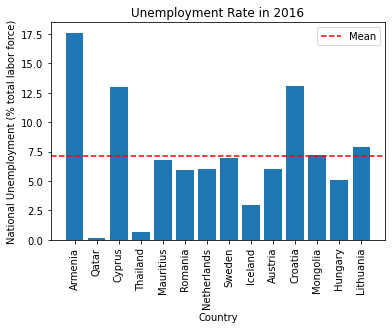

7.1014285714285705

In [11]:
fig, ax = plt.subplots()
ax.bar(unemploymentRate.country, unemploymentRate.Rate)
# draw the mean line against the bar chart
plt.axhline(y = umemployedMean , color = 'r', linestyle = '--', label = 'Mean')
plt.xticks(rotation = 90)
plt.title('Unemployment Rate in 2016')
plt.xlabel('Country')
plt.ylabel('National Unemployment (% total labor force)')
plt.legend()
plt.show()

umemployedMean

Keeping in mind that from left to right on the x-axis, is the lowest to highest suicide rate. Though with my assumption that Armenia seems to be the happiest country with the lowest suicide rate, it also has the highest unemployment rate. Of course, we cannot correlate these two exclusively because there are many other reasons for suicide. <!-- try to say more here? -->

### Gross Development Product in 2016
Gross Development Product, or GDP, is one of the factors that go into deciding the happiness of a nation.

I am using the same dataset as the one used for the rate of suicides as it also ahs data pertaining the GDP of a nation.

In [12]:
gdp = kaggle.loc[kaggle.year == 2016]
gdp = gdp.drop(columns = [ 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', ' gdp_for_year ($) ', 'generation'])
gdp = gdp.loc[(gdp.country != 'Grenada') & (gdp.country != 'Czech Republic')]
# renaming the column to remove the spaces between the words and illegal character '($)'
gdp = gdp.rename(columns = {'gdp_per_capita ($)' : 'gdpcapita'})
gdp.head(5)

,country,year,gdpcapita
1248,Armenia,2016,3788
1249,Armenia,2016,3788
1250,Armenia,2016,3788
1251,Armenia,2016,3788
1252,Armenia,2016,3788


Using the custom order, I will now sort the table and then find the mean.

In [13]:
gdp = gdp.groupby(['country']).mean().reset_index()
# categorizing the data by country and customOrder
gdp['country'] = pd.Categorical(gdp['country'], customOrder)
gdp = gdp.sort_values('country')
gdpMean = round(gdp['gdpcapita'].mean(), 2)
gdp

,country,year,gdpcapita
0,Armenia,2016,3788
10,Qatar,2016,62484
3,Cyprus,2016,25098
13,Thailand,2016,6713
7,Mauritius,2016,10570
11,Romania,2016,10020
9,Netherlands,2016,48108
12,Sweden,2016,55594
5,Iceland,2016,64708
1,Austria,2016,46976


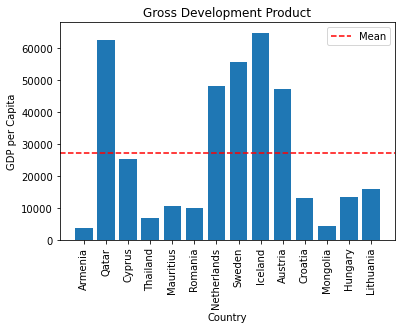

27164.21

In [14]:
fig, ax = plt.subplots()
ax.bar(gdp.country, gdp.gdpcapita)
# draw the mean against the bar chart
plt.axhline(y = gdpMean , color = 'r', linestyle = '--', label = 'Mean')
plt.xticks(rotation = 90)
plt.title('Gross Development Product')
plt.ylabel('GDP per Capita')
plt.xlabel('Country')
plt.legend()
plt.show()

gdpMean

### Human Development Index in 2016
Human development is based on life expectancy, expected/mean years in schooling and standard of living.

This dataset comes from Our World in Data. I did not use the HDI in the Kaggle dataset due to most of the HDI values being NaN, hence I acquired and downloaded a different dataset from a different website.

Data Source: https://ourworldindata.org/grapher/human-development-index?tab=chart&time=2016

In [15]:
OurWorldInData = pd.read_csv("human-development-index.csv", delimiter = ",")
# cleaning up unwanted columns and data
OurWorldInData = OurWorldInData.drop(columns = ['Code'])
OurWorldInData = OurWorldInData.loc[(OurWorldInData.Entity != 'Grenada') & (OurWorldInData.Entity != 'Czech Republic')]
OurWorldInData = OurWorldInData.loc[OurWorldInData.Year == 2016]
OurWorldInData.head(5)

,Entity,Year,Human Development Index (UNDP)
16,Afghanistan,2016,0.494
46,Albania,2016,0.782
74,Algeria,2016,0.753
92,Andorra,2016,0.856
111,Angola,2016,0.577


Similar to the unemployment table, I am extracting out the countries needed in the same way.

In [16]:
hdi = pd.DataFrame()
for i in customOrder:
    temp = OurWorldInData.loc[OurWorldInData.Entity == i]
    hdi = hdi.append(temp)
hdiMean = round(hdi['Human Development Index (UNDP)'].mean(), 2)
hdi

,Entity,Year,Human Development Index (UNDP)
182,Armenia,2016,0.749
3692,Qatar,2016,0.855
1143,Cyprus,2016,0.867
4468,Thailand,2016,0.748
2921,Mauritius,2016,0.788
3720,Romania,2016,0.807
3220,Netherlands,2016,0.928
4322,Sweden,2016,0.932
2015,Iceland,2016,0.933
240,Austria,2016,0.906


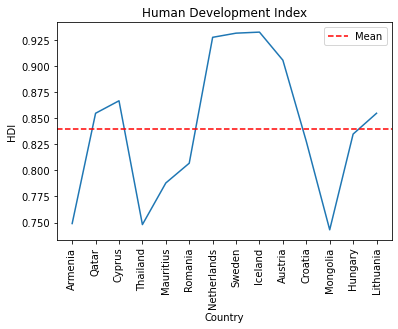

0.84

In [17]:
fig, ax = plt.subplots()
ax.plot(hdi.Entity, hdi['Human Development Index (UNDP)'])
# draw the mean against the plot
plt.axhline(y = hdiMean , color = 'r', linestyle = '--', label = 'Mean')
plt.xticks(rotation = 90)
plt.title('Human Development Index')
plt.ylabel('HDI')
plt.xlabel('Country')
plt.legend()
plt.show()

hdiMean

### World Happiness in 2016
This data comes from the World Happiness Report. This is where we see how ranking is determined by the six factors. I will be using the ranks in this dataset, but first I will determine the weakness of using the kaggle dataset against this one. Though this data comes from Kaggle, the data is accurate when comparing to the World Happiness Report of 2016.

Data Source: https://www.kaggle.com/unsdsn/world-happiness?select=2016.csv

World Happiness Report 2016: https://s3.amazonaws.com/happiness-report/2016/HR-V1_web.pdf

In [18]:
WorldHappiness = pd.read_csv("2016.csv", delimiter = ",")
WorldHappiness.head(5)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


The reason I will not be using the other five factors (family, health, freedom, trust and generosity), is because I believe that the GDP heavily affects the rank of each country. I am also using the GDP to compare with the GDP from the gdp table to determine accuracy.

In [19]:
happinessIndex = pd.DataFrame()
for i in customOrder:
    temp = WorldHappiness.loc[WorldHappiness.Country == i]
    happinessIndex = happinessIndex.append(temp)
# cleaning up unwanted data
happinessIndex = happinessIndex.drop(columns = ['Region', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'])
# renaming of columns for easy use later on
happinessIndex = happinessIndex.rename(columns = {'Economy (GDP per Capita)' : 'Economy'})
happinessIndex = happinessIndex.rename(columns = {'Happiness Score' : 'Score'})
happinessIndex = happinessIndex.rename(columns = {'Health (Life Expectancy)' : 'Health'})
happinessIndex

,Country,Happiness Rank,Score,Economy
120,Armenia,121,4.360,0.86086
35,Qatar,36,6.375,1.82427
68,Cyprus,69,5.546,1.31857
32,Thailand,33,6.474,1.08930
65,Mauritius,66,5.648,1.14372
70,Romania,71,5.528,1.16970
6,Netherlands,7,7.339,1.46468
9,Sweden,10,7.291,1.45181
2,Iceland,3,7.501,1.42666
11,Austria,12,7.119,1.45038


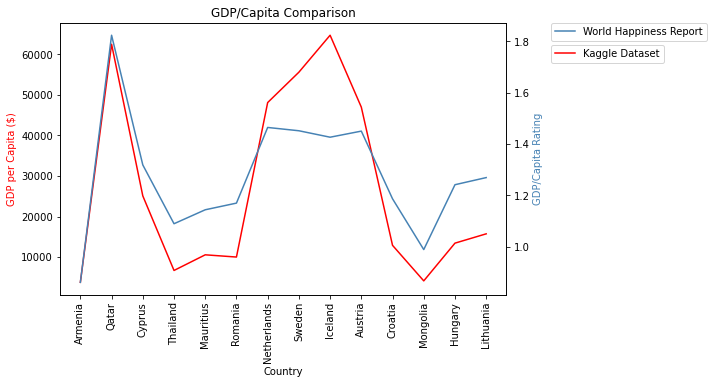

In [20]:
fig = plt.figure(figsize = (8, 5))
ax1 = plt.subplot(1, 1, 1)
plt.xticks(rotation = 'vertical')
plt.xlabel('Country')
# plotting the kaggle dataset
ax1.plot(gdp.country, gdp.gdpcapita, color = 'r', label = 'Kaggle Dataset')
plt.ylabel('GDP per Capita ($)', color = 'r')
plt.legend()
plt.legend(bbox_to_anchor = (1.1, 0.92), loc = 'upper left', borderaxespad = 0)
# plotting the world happiness dataset
# create a twin axes sharing the x-axis with an independant y-axis
ax2 = ax1.twinx()
ax2.plot(happinessIndex.Country, happinessIndex.Economy, color = 'steelblue', label = 'World Happiness Report')
plt.ylabel('GDP/Capita Rating', color = 'steelblue')
plt.legend()
plt.legend(bbox_to_anchor = (1.1, 1), loc = 'upper left', borderaxespad = 0)
plt.title('GDP/Capita Comparison')
plt.show()

Both datas can be said to be accurate due to the similar trend. But the weakness lies in that the GDP from World Happiness Report is a mere rating, while the one from the Kaggle daaset is the actual numbers. Furthermore, the rating from the World Happiness Report is compared against many other countries, which may also account for the different trend for Sweden and Iceland.

Now I will plot the countries' ranks and scores.

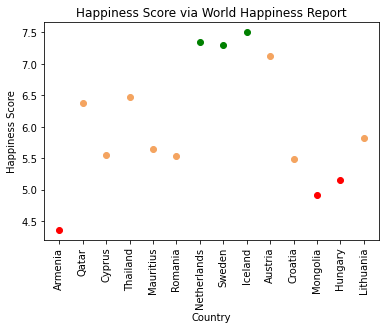

In [21]:
# https://www.geeksforgeeks.org/mark-different-color-points-on-matplotlib/
x = np.array(happinessIndex.Country)
y = np.array(happinessIndex.Score)
clrs = []
# for the top 3 in rank, the color will be green, bottom 3 will be red, and the rest yellow
for i in happinessIndex['Happiness Rank']:
    if i <= 10:
        clrs.append('green')
    elif i <= 90:
        clrs.append('sandybrown')
    else:
        clrs.append('red')
fig, ax = plt.subplots()
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = clrs[i])
plt.xticks(rotation = 90)
plt.title('Happiness Score via World Happiness Report')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.show()

The way I plotted this graph is to show that the green dots are the "top 3 happiest countries" (in the current dataset) and the red dots are the "bottom 3".

I will now compare the HDI and GDP to this.

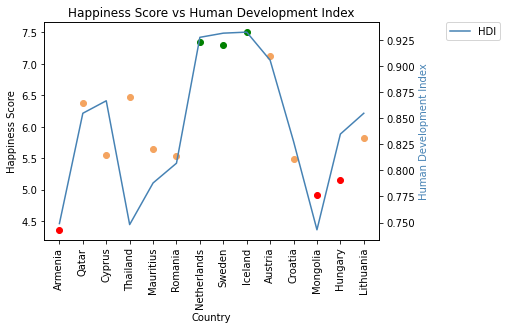

In [22]:
fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
plt.xlabel('Country')
for i in range(len(x)):
    ax1.scatter(x[i], y[i], c = clrs[i])
plt.ylabel('Happiness Score')
# plotting the hdi
# create a twin axes sharing the x-axis with an independant y-axis
ax2 = ax1.twinx()
ax2.plot(hdi.Entity, hdi['Human Development Index (UNDP)'], label = 'HDI', c = 'steelblue')
plt.ylabel('Human Development Index', c = 'steelblue')
plt.legend()
plt.legend(bbox_to_anchor = (1.2, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Happiness Score vs Human Development Index')
plt.show()

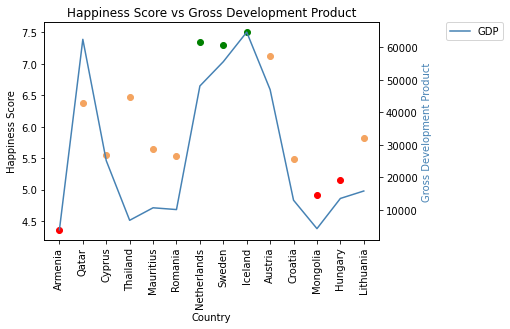

In [23]:
fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
plt.xlabel('Country')
for i in range(len(x)):
    ax1.scatter(x[i], y[i], c = clrs[i])
plt.ylabel('Happiness Score')
# plotting the gdp
# create a twin axes sharing the x-axis with an independant y-axis
ax2 = ax1.twinx()
ax2.plot(gdp.country, gdp.gdpcapita, label = 'GDP', c = 'steelblue')
plt.ylabel('Gross Development Product', c = 'steelblue')
plt.legend()
plt.legend(bbox_to_anchor = (1.2, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Happiness Score vs Gross Development Product')
plt.show()

In both the HDI and GDP plots, there is again a similar trend to the happiness rankings. The Happiness Ranks could be heavily swayed by the GDP of a country. Even though the HDI is not a factor that goes into calculating the Happiness Score, you can also spot a trend in the graph. But can we really determine happiness by these factors? It stands to question that just because a nation can further itself, societal issues still prevail.

Below I will calculate the weightage of the six factors against the happiness scores.

In [24]:
for index, row in WorldHappiness.iterrows():
#     i will only be examining the first row
    if index == 0:
#         gdp
        economy = int(round((row['Economy (GDP per Capita)'] / row['Happiness Score']) * 100, 0))
        print('GDP per Capita statistic accounts for', economy, '% of Happiness Score')
#         family
        family = int(round((row['Family'] / row['Happiness Score']) * 100, 0))
        print('Family statistic accounts for', family, '% of Happiness Score')
#         health
        health = int(round((row['Health (Life Expectancy)'] / row['Happiness Score']) * 100, 0))
        print('Health (Life Expectancy) statistic accounts for', health, '% of Happiness Score')
#         freedom
        freedom = int(round((row['Freedom'] / row['Happiness Score']) * 100, 0))
        print('Freedom statistic accounts for', freedom, '% of Happiness Score')
#         trust
        trust = int(round((row['Trust (Government Corruption)'] / row['Happiness Score']) * 100, 0))
        print('Trust (Government Corruption) statistic accounts for', trust, '% of Happiness Score')
#         generosity
        generosity = int(round((row['Generosity'] / row['Happiness Score']) * 100, 0))
        print('Generosity statistic accounts for', generosity, '% of Happiness Score')
#         dystopia
        dystopia = int(round((row['Dystopia Residual'] / row['Happiness Score']) * 100, 0))
        print('Dystopia Residual statistic accounts for', dystopia, '% of Happiness Score')
# the reason i used round() first and not int(), is because int() will round the number to the integer it is closer to, even if
# it is rounded down, while round() will round up the number, giving a full 100%

GDP per Capita statistic accounts for 19 % of Happiness Score
Family statistic accounts for 15 % of Happiness Score
Health (Life Expectancy) statistic accounts for 11 % of Happiness Score
Freedom statistic accounts for 8 % of Happiness Score
Trust (Government Corruption) statistic accounts for 6 % of Happiness Score
Generosity statistic accounts for 5 % of Happiness Score
Dystopia Residual statistic accounts for 36 % of Happiness Score


As you can see, the GDP has the highest weightage out of all the six factors. Keep in mind that Dystopia Residual is only a benchmark.

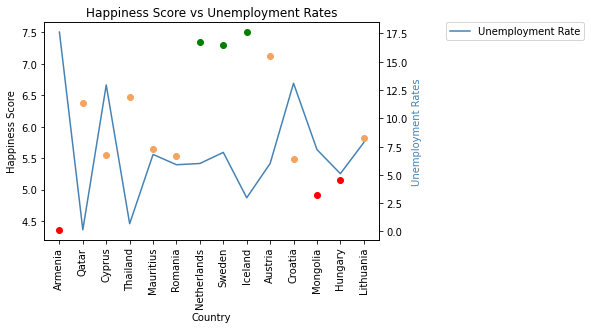

In [25]:
fig, ax1 = plt.subplots()
plt.xticks(rotation = 90)
plt.xlabel('Country')
for i in range(len(x)):
    ax1.scatter(x[i], y[i], c = clrs[i])
plt.ylabel('Happiness Score')
# plotting the gdp
# create a twin axes sharing the x-axis with an independant y-axis
ax2 = ax1.twinx()
ax2.plot(unemploymentRate.country, unemploymentRate.Rate, label = 'Unemployment Rate', color = 'steelblue')
plt.ylabel('Unemployment Rates', c = 'steelblue')
plt.legend()
plt.legend(bbox_to_anchor = (1.2, 1), loc = 'upper left', borderaxespad = 0)
plt.title('Happiness Score vs Unemployment Rates')
plt.show()

As a reminder, the x-axis is sorted by the country with the lowest suicide rate to the country with the highest suicide rate. Compared to the unemployment rate and happiness rankings, the data is vastly different.

### Conclusion
Though it is undeniable that the world is advancing, as GDPs and HDIs are constantly increasing, things like suicide and unemployment will still be around. 

Instead of determining happiness with the six factors, happiness should be measured by things like suicide, unemployment, mental health, poverty, issues like sexism, or even fairness in law (discriminatory laws against minorities).

Using the suicide and unemployment table, I will be calculating "new" happiness rankings for the countries in the dataset. First I will merge the two tables on country.

In [26]:
combinedData = pd.merge(suicideRate, unemploymentRate, how = 'outer', on = 'country')
combinedData = combinedData.rename(columns = {'suicidesper100kpop' : 'Suicide'})
combinedData = combinedData.rename(columns = {'Rate' : 'Unemployment'})
combinedData = combinedData.drop(columns = ['suicides_no', 'population'])
combinedData

,country,Suicide,Unemployment
0,Armenia,2.79,17.62
1,Qatar,3.07,0.15
2,Cyprus,5.06,12.95
3,Thailand,7.70,0.69
4,Mauritius,9.87,6.81
5,Romania,11.73,5.90
6,Netherlands,13.24,6.01
7,Sweden,13.91,6.99
8,Iceland,14.88,2.98
9,Austria,16.05,6.01


Assuming that a higher score means a happier country, a rate of 1 = good, while a rate of 0 = bad. I will explain the calculation within the code.

In [27]:
# the lower the suicide rate --> the better
# min value will be 0 while max value will be 1
minSuicide = combinedData['Suicide'].min()
maxSuicide = combinedData['Suicide'].max()
# range will be use to calculate rating
rangeSuicide = maxSuicide - minSuicide

# the lower the unemployment rate --> the better
# min value will be 0 while max value will be 1
minUnemployment = combinedData['Unemployment'].min()
maxUnemployment = combinedData['Unemployment'].max()
# range will be use to calculate rating
rangeUnemployment = maxUnemployment - minUnemployment

newData = combinedData
for i in combinedData.iterrows():
#     for each country, deduct the minSuicide from it's own suicide rate
    newSuicide = i[1].Suicide - minSuicide
#     using the remainder, divide it by the range
    newSuicide = newSuicide / rangeSuicide
#     subtract from 1 to determine the rating
    newSuicide = 1 - newSuicide
#     replace the data with the rating
    newData = newData.replace(i[1].Suicide, newSuicide)
    
#     for each country, deduct the minUnemployment from it's own unemployment rate
    newUnemployment = i[1].Unemployment - minUnemployment
#     using the remainder, divide it by the range
    newUnemployment = newUnemployment / rangeUnemployment
#     subtract from 1 to determine the rating
    newUnemployment = 1 - newUnemployment
#     replace the data with the rating
    newData = newData.replace(i[1].Unemployment, newUnemployment)
    
newData

,country,Suicide,Unemployment
0,Armenia,1.000000,0.000000
1,Qatar,0.990918,1.000000
2,Cyprus,0.926370,0.267315
3,Thailand,0.840740,0.969090
4,Mauritius,0.770354,0.618775
5,Romania,0.710023,0.670864
6,Netherlands,0.661044,0.664568
7,Sweden,0.639312,0.608472
8,Iceland,0.607849,0.838008
9,Austria,0.569899,0.664568


In [28]:
from IPython.display import display_html 

# temporary list to store scores and ranks
score = []
rank = []
temp = 1
for i in newData.iterrows():
#     to determine the new happiness score, add both suicide rating and unmployment rating together
    newScore = i[1].Suicide + i[1].Unemployment
    score.append(newScore)
    rank.append(temp)
    temp = temp + 1
    
newHappinessIndex = newData
# add in the new column and score values
newHappinessIndex['Score'] = score
# sort by score, the higher the score, the happier the country
newHappinessIndex = newHappinessIndex.sort_values(by = ['Score'], ascending = False)
# rank the countries
newHappinessIndex['Happiness Rank'] = rank
newHappinessIndex = newHappinessIndex.drop(columns = ['Suicide', 'Unemployment']).reset_index()
newHappinessIndex = newHappinessIndex.drop(columns = ['index'])
newHappinessIndex = newHappinessIndex[['country', 'Happiness Rank', 'Score']]

oldHappinessIndex = happinessIndex
oldHappinessIndex = oldHappinessIndex.drop(columns = ['Economy'])
oldHappinessIndex = oldHappinessIndex.sort_values(by = ['Happiness Rank'], ascending = True).reset_index()
oldHappinessIndex = oldHappinessIndex.drop(columns = ['index'])

# i am re-ranking the ranks in oldHappinessIndex for the sake of visualization
tempRank = 1
for i in oldHappinessIndex.iterrows():
    oldHappinessIndex = oldHappinessIndex.replace(i[1]['Happiness Rank'], tempRank)
    tempRank = tempRank + 1

newHappinessIndex = newHappinessIndex.style.set_table_attributes("style = 'display : inline'").set_caption('New Happiness Ranking')
oldHappinessIndex = oldHappinessIndex.style.set_table_attributes("style = 'display : inline'").set_caption('Old Happiness Ranking')
space = "\xa0" * 10

display_html(oldHappinessIndex._repr_html_() + space  + newHappinessIndex._repr_html_(), raw = True)

,Country,Happiness Rank,Score
0,Iceland,1,7.501000
1,Netherlands,2,7.339000
2,Sweden,3,7.291000
3,Austria,4,7.119000
4,Thailand,5,6.474000
5,Qatar,6,6.375000
6,Lithuania,7,5.813000
7,Mauritius,8,5.648000
8,Cyprus,9,5.546000
9,Romania,10,5.528000


If we were to calculate happiness on social issues such as suicide and unemployment, you can already see a vast change in the rank of all the countries.

Obviously these calculations are neither accurate or fair as these are only two factors and there are more to research about and consider, such as mental health and the weightage of them. However, the calculation that I have made could open new possibilities to determining a country's happiness, not about the market, but more about the society and it's people.